## Check PD related genes from BR single-cell

To examine the transcriptional regulation of PD-related genes by BRs, we reanalyzed a previously described scRNA-seq dataset (GEO: GSE212230)

The Seurat Object can be downloaded from GEO. Other required files are available in this repo. 

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(gprofiler2)
library(readxl)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

Loading required package: grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex hea

In [2]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_4/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.1.0       readxl_1.3.1          gprofiler2_0.2.0     
 [4] GeneOverlap_1.24.0    circlize_0.4.14       ComplexHeatmap_2.11.1
 [7] cowplot_1.1.0         SeuratObject_4.0.2    Seurat_4.0.5         
[10] forcats_0.5.0         stringr_1.4.0         dplyr_1.0.7          
[13]

In [3]:
BL2_hr <- read_csv("./docs/v4_BL2hr_v_BRZ_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [4]:
pd_genes <- read_csv("./data/PD_genes.csv") %>%
rename(gene=GeneID)


── Column specification ────────────────────────────────────────────────────────
cols(
  Name = col_character(),
  GeneID = col_character(),
  type = col_character()
)




In [5]:
pd_genes

Name,gene,type
<chr>,<chr>,<chr>
CalS11/GSL1,AT4G04970,callose deposition
CalS5/GSL2,AT2G13680,callose deposition
CalS2/GSL3,AT2G31960,callose deposition
CalS8/GSL4,AT3G14570,callose deposition
CalS12/GSL5,AT4G03550,callose deposition
CalS1/GSL6,AT1G05570,callose deposition
CalS7/GSL7,AT1G06490,callose deposition
CalS10/GSL8,AT2G36850,callose deposition
CalS4/GSL9,AT5G36870,callose deposition


In [6]:
BL_pd <- filter(BL2_hr, gene %in% pd_genes$gene) %>%
left_join(pd_genes, by="gene")

In [7]:
write_csv(BL_pd, "./docs/PD_genes_BL_2_hour_sc.csv")

In [8]:
BL_pd

X1,gene,cluster_id,sc_2.cpm,sc_43.cpm,sc_50.cpm,sc_5.cpm,sc_46.cpm,sc_49.cpm,sc_2.frq,⋯,p_adj.loc,p_adj.glb,contrast,Name.x,TF_Name,Description,up_dn_label,clust_up_dn,Name.y,type
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
671,AT2G33330,Elongation_Cortex,1.950,2.49,0.82,20.20,31.40,38.20,0.0337,⋯,1.00e-21,1.18e-18,BL-BRZ,CRRSP11,NA,NA,Up,Elongation_Cortex_Up,PDLP3,callose deposition
1150,AT2G33330,Transition Domain_Cortex,2.650,6.77,1.17,18.00,30.90,29.30,0.0493,⋯,6.41e-17,2.23e-13,BL-BRZ,CRRSP11,NA,NA,Up,Transition Domain_Cortex_Up,PDLP3,callose deposition
1962,AT4G03550,Elongation_Atrichoblast,36.500,19.20,22.10,119.00,71.90,58.10,0.2420,⋯,1.14e-12,1.08e-08,BL-BRZ,CALS12,NA,NA,Up,Elongation_Atrichoblast_Up,CalS12/GSL5,callose deposition
4028,AT4G03550,Transition Domain_Atrichoblast,62.500,47.70,29.70,138.00,69.10,79.40,0.5520,⋯,2.09e-08,4.47e-04,BL-BRZ,CALS12,NA,NA,Up,Transition Domain_Atrichoblast_Up,CalS12/GSL5,callose deposition
4407,AT3G14570,Transition Domain_Pericycle,6.540,0.00,0.00,39.10,87.70,46.30,0.0909,⋯,5.59e-08,8.56e-05,BL-BRZ,CALS8,NA,NA,Up,Transition Domain_Pericycle_Up,CalS8/GSL4,callose deposition
5622,AT1G18650,Transition Domain_Cortex,6.840,7.57,6.41,17.20,28.50,17.90,0.1080,⋯,7.68e-07,1.13e-02,BL-BRZ,PDCB3,NA,NA,Up,Transition Domain_Cortex_Up,PDCB3,callose binding
6187,AT1G05570,Proliferation Domain_Atrichoblast,0.802,3.78,2.53,5.32,12.50,8.18,0.0303,⋯,1.98e-06,2.37e-02,BL-BRZ,CALS1,NA,NA,Up,Proliferation Domain_Atrichoblast_Up,CalS1/GSL6,callose deposition
6272,AT1G18650,Proliferation Domain_Atrichoblast,2.140,5.87,4.48,7.22,15.40,13.00,0.0707,⋯,2.22e-06,2.68e-02,BL-BRZ,PDCB3,NA,NA,Up,Proliferation Domain_Atrichoblast_Up,PDCB3,callose binding
8773,AT5G43980,Elongation_Endodermis,17.600,17.40,26.80,8.28,8.86,13.90,0.2640,⋯,4.07e-05,8.67e-01,BL-BRZ,CRRSP56,NA,NA,Down,Elongation_Endodermis_Down,PDLP1,callose deposition


In [9]:
all_cells_BL <- read_csv("./Brassinosteroid-gene-regulatory-networks-at-cellular-resolution/output/v4_all_BL2hr_v_BRZ_all_cells_pseudobulked_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  clust_gene = col_character(),
  Name = col_character(),
  DE = col_logical(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [10]:
BL_all_pd <- filter(all_cells_BL, gene %in% BL_pd$gene) %>%
left_join(pd_genes, by="gene")

In [11]:
BL_all_pd

X1,gene,cluster_id,sc_2.cpm,sc_43.cpm,sc_50.cpm,sc_5.cpm,sc_46.cpm,sc_49.cpm,sc_2.frq,⋯,p_adj.loc,p_adj.glb,contrast,clust_gene,Name.x,DE,up_dn_label,clust_up_dn,Name.y,type
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
362,AT1G05570,all,3.21,5.57,6.41,5.24,5.34,4.77,0.0280,⋯,0.866000,1.0000,BL-BRZ,all_AT1G05570,CALS1,FALSE,NA,NA,CalS1/GSL6,callose deposition
1410,AT1G18650,all,1.83,3.24,2.90,4.28,7.65,6.08,0.0204,⋯,0.001730,0.8270,BL-BRZ,all_AT1G18650,PDCB3,TRUE,Up,all_Up,PDCB3,callose binding
3616,AT1G66250,all,2.48,4.42,2.41,2.07,4.85,3.10,0.0286,⋯,0.904000,1.0000,BL-BRZ,all_AT1G66250,AT1G66250,FALSE,NA,NA,PdBG3,callose degradation
3915,AT1G70690,all,14.80,6.93,12.20,11.80,11.20,15.80,0.1220,⋯,0.613000,1.0000,BL-BRZ,all_AT1G70690,CRRSP2,FALSE,NA,NA,PDLP5,callose deposition
4755,AT2G01630,all,6.24,7.30,5.54,10.10,8.92,8.30,0.0630,⋯,0.046700,1.0000,BL-BRZ,all_AT2G01630,AT2G01630,FALSE,NA,NA,PdBG2,callose degradation
6317,AT2G33330,all,1.47,2.33,2.11,5.86,7.38,7.23,0.0161,⋯,0.000246,0.0208,BL-BRZ,all_AT2G33330,CRRSP11,TRUE,Up,all_Up,PDLP3,callose deposition
8578,AT3G14570,all,3.91,5.31,3.92,9.20,7.67,8.75,0.0152,⋯,0.006660,1.0000,BL-BRZ,all_AT3G14570,CALS8,TRUE,Up,all_Up,CalS8/GSL4,callose deposition
10732,AT3G59100,all,4.87,6.44,5.24,9.91,7.97,9.15,0.0382,⋯,0.018000,1.0000,BL-BRZ,all_AT3G59100,CALS6,TRUE,Up,all_Up,CalS6/GSL11,callose deposition
11356,AT4G03550,all,32.00,26.60,23.20,47.80,35.60,37.40,0.2820,⋯,0.006220,1.0000,BL-BRZ,all_AT4G03550,CALS12,FALSE,NA,NA,CalS12/GSL5,callose deposition


In [12]:
colnames(BL_all_pd)

[1] "X1"          "gene"        "cluster_id"  "sc_2.cpm"    "sc_43.cpm"  
 [6] "sc_50.cpm"   "sc_5.cpm"    "sc_46.cpm"   "sc_49.cpm"   "sc_2.frq"   
[11] "sc_43.frq"   "sc_50.frq"   "sc_5.frq"    "sc_46.frq"   "sc_49.frq"  
[16] "BRZ.frq"     "BL.frq"      "logFC"       "logCPM"      "F"          
[21] "p_val"       "p_adj.loc"   "p_adj.glb"   "contrast"    "clust_gene" 
[26] "Name.x"      "DE"          "up_dn_label" "clust_up_dn" "Name.y"     
[31] "type"

In [13]:
(BL_all_sel <- select(BL_all_pd, gene, Name=Name.y, type, logFC) %>%
arrange(desc(logFC)) %>%
arrange(type))

gene,Name,type,logFC
<chr>,<chr>,<chr>,<dbl>
AT1G18650,PDCB3,callose binding,1.1800
AT2G01630,PdBG2,callose degradation,0.5130
AT1G66250,PdBG3,callose degradation,0.0626
AT2G33330,PDLP3,callose deposition,1.8100
AT3G14570,CalS8/GSL4,callose deposition,0.9630
AT3G59100,CalS6/GSL11,callose deposition,0.7070
AT4G03550,CalS12/GSL5,callose deposition,0.5600
AT1G70690,PDLP5,callose deposition,0.2230
AT1G05570,CalS1/GSL6,callose deposition,0.0669


In [14]:
BL_all_pd <- filter(all_cells_BL, gene %in% pd_genes$gene) %>%
left_join(pd_genes, by="gene")

In [15]:
BL_all_pd

X1,gene,cluster_id,sc_2.cpm,sc_43.cpm,sc_50.cpm,sc_5.cpm,sc_46.cpm,sc_49.cpm,sc_2.frq,⋯,p_adj.loc,p_adj.glb,contrast,clust_gene,Name.x,DE,up_dn_label,clust_up_dn,Name.y,type
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
268,AT1G04520,all,13.400,9.050,7.670,13.400,10.900,10.400,0.08810,⋯,0.265000,1.0000,BL-BRZ,all_AT1G04520,CRRSP3,FALSE,NA,NA,PDLP2,callose deposition
362,AT1G05570,all,3.210,5.570,6.410,5.240,5.340,4.770,0.02800,⋯,0.866000,1.0000,BL-BRZ,all_AT1G05570,CALS1,FALSE,NA,NA,CalS1/GSL6,callose deposition
1410,AT1G18650,all,1.830,3.240,2.900,4.280,7.650,6.080,0.02040,⋯,0.001730,0.8270,BL-BRZ,all_AT1G18650,PDCB3,TRUE,Up,all_Up,PDCB3,callose binding
3616,AT1G66250,all,2.480,4.420,2.410,2.070,4.850,3.100,0.02860,⋯,0.904000,1.0000,BL-BRZ,all_AT1G66250,AT1G66250,FALSE,NA,NA,PdBG3,callose degradation
3915,AT1G70690,all,14.800,6.930,12.200,11.800,11.200,15.800,0.12200,⋯,0.613000,1.0000,BL-BRZ,all_AT1G70690,CRRSP2,FALSE,NA,NA,PDLP5,callose deposition
4755,AT2G01630,all,6.240,7.300,5.540,10.100,8.920,8.300,0.06300,⋯,0.046700,1.0000,BL-BRZ,all_AT2G01630,AT2G01630,FALSE,NA,NA,PdBG2,callose degradation
6230,AT2G31960,all,23.500,22.500,20.000,27.300,19.400,20.700,0.18200,⋯,0.931000,1.0000,BL-BRZ,all_AT2G31960,CALS2,FALSE,NA,NA,CalS2/GSL3,callose deposition
6317,AT2G33330,all,1.470,2.330,2.110,5.860,7.380,7.230,0.01610,⋯,0.000246,0.0208,BL-BRZ,all_AT2G33330,CRRSP11,TRUE,Up,all_Up,PDLP3,callose deposition
6571,AT2G36850,all,57.500,48.900,42.400,61.000,47.900,48.900,0.39400,⋯,0.614000,1.0000,BL-BRZ,all_AT2G36850,CALS10,FALSE,NA,NA,CalS10/GSL8,callose deposition


In [16]:
(BL_all_sel <- select(BL_all_pd, gene, Name=Name.y, type, logFC) %>%
arrange(desc(logFC)) %>%
arrange(type))

gene,Name,type,logFC
<chr>,<chr>,<chr>,<dbl>
AT1G18650,PDCB3,callose binding,1.1800
AT5G08000,PDCB2,callose binding,1.0500
AT5G61130,PDCB1,callose binding,0.3440
AT2G01630,PdBG2,callose degradation,0.5130
AT1G66250,PdBG3,callose degradation,0.0626
AT2G33330,PDLP3,callose deposition,1.8100
AT3G14570,CalS8/GSL4,callose deposition,0.9630
AT3G59100,CalS6/GSL11,callose deposition,0.7070
AT4G03550,CalS12/GSL5,callose deposition,0.5600


In [17]:
mat1 <- as.matrix(BL_all_sel$logFC)
rownames(mat1) <- BL_all_sel$Name

In [18]:
mat1

PDCB3,1.1800
PDCB2,1.0500
PDCB1,0.3440
PdBG2,0.5130
PdBG3,0.0626
PDLP3,1.8100
CalS8/GSL4,0.9630
CalS6/GSL11,0.7070
CalS12/GSL5,0.5600
CalS4/GSL9,0.3430
PDLP2,0.2330


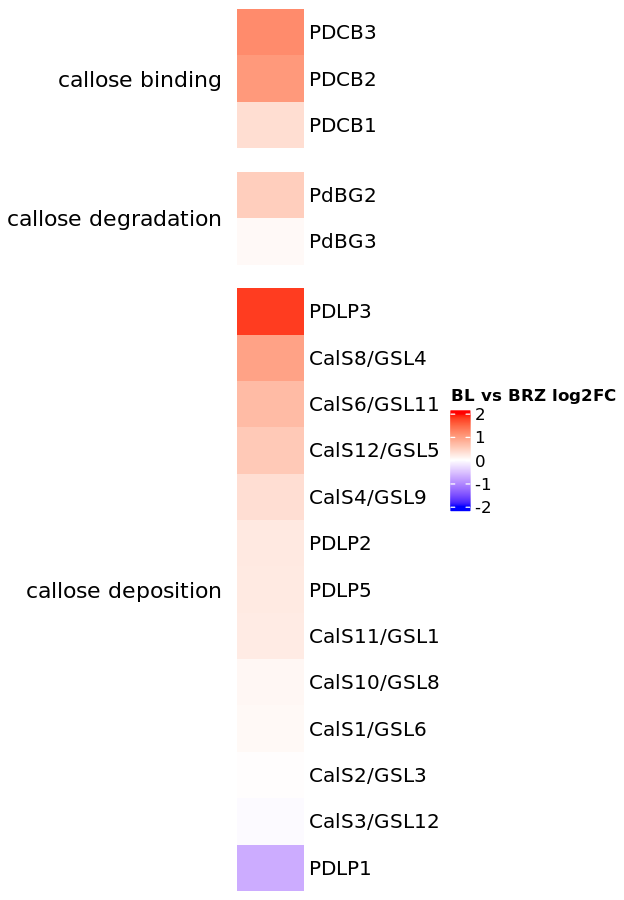

In [19]:
# all genes - not just DE

options(repr.plot.width=5.2, repr.plot.height=7.5)
pd_hm <- Heatmap(mat1, cluster_columns=F, cluster_rows = FALSE, split=BL_all_sel$type, row_title_rot = 0, row_gap = unit(5, "mm"), name = "BL vs BRZ log2FC    ", 
                col = colorRamp2(c(-2,0, 2), c("blue", "white", "red")))

draw(pd_hm)

In [20]:
pdf("./docs/PD_plots/PD_BL_hm_all_genes.pdf", width = 5.2, height = 7.5)


# padding - bottom, left, top, right
draw(pd_hm)

dev.off()

png 
  2

In [21]:
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

In [22]:
rc.integrated <- readRDS("./data/integrations/rc.integrated_14S_BR_Li_seu3_clean.rds")

In [23]:
rc.integrated

An object of class Seurat 
71231 features across 79982 samples within 3 assays 
Active assay: integrated (17732 features, 17732 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

## Cell type and developmental stage metadata

- Developmental stage: `time_zone`
- Cell type:`cell_type`
- Combination of cell type and developmental stage: `time_zone_cell_type`
- Combination of cell type and developmental stage with cell subtypes (not used): `time_zone_cell_subtypes` 

In [24]:
feature_names <- read_tsv("./data/features.tsv.gz", col_names = c("AGI", "Name", "Type")) %>%
  select(-Type) %>%
  distinct()


── Column specification ────────────────────────────────────────────────────────
cols(
  AGI = col_character(),
  Name = col_character(),
  Type = col_character()
)




In [25]:
# subset BRZ and BL 2 hour samples only samples you want to compare

integrated.de <- subset(rc.integrated, subset = sample %in% c("sc_2", "sc_5", "sc_43","sc_46","sc_49","sc_50"))


In [26]:
integrated.de

An object of class Seurat 
71231 features across 43748 samples within 3 assays 
Active assay: integrated (17732 features, 17732 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

In [27]:
# code control vs treated manually

integrated.de$treated <- integrated.de$time_trt %in% c("2_hour_BL")

table(integrated.de$treated)
table(integrated.de$sample)

integrated.de$treatment <- as.character(integrated.de$treated)

integrated.de$treatment<- gsub("TRUE", "BL", integrated.de$treatment, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)
  
integrated.de$treatment<- gsub("FALSE", "BRZ", integrated.de$treatment, ignore.case = FALSE, perl = FALSE,
     fixed = T, useBytes = FALSE)

integrated.de$treatment <- factor(integrated.de$treatment, levels=c("BRZ", "BL"))


table(integrated.de$treatment)


FALSE  TRUE 
21473 22275 


 sc_2 sc_43 sc_46 sc_49  sc_5 sc_50 
 7512  8874  6847  5638  9790  5087 


  BRZ    BL 
21473 22275 

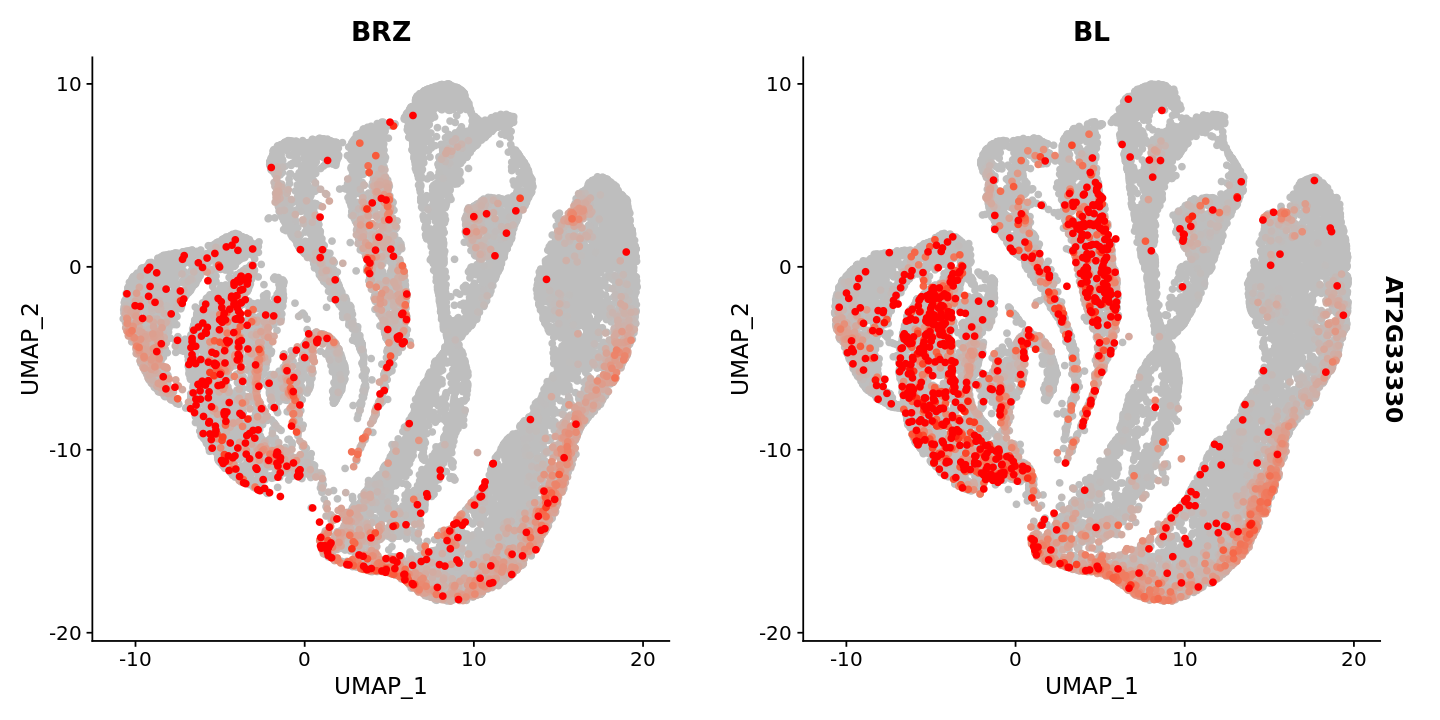

In [28]:
options(repr.plot.width=12, repr.plot.height=6)
FeaturePlot(integrated.de, features = "AT2G33330", split.by = "treatment",
    cols = c("grey", "red"), label=F, repel=T, pt.size = 1.5, label.size = 3.5, order=T, min.cutoff = "q10", max.cutoff = "q90")

In [29]:
vio_dot <- function(ser_obj = integrated.de, gene_name, gene_id, save_path="./docs/PD_plots/") {
  
  p1 <- VlnPlot(ser_obj, features = gene_id, split.by = "treatment", pt.size = 0) + ggtitle(gene_name)
  
  p2 <- FeaturePlot(ser_obj, features = gene_id, split.by = "treatment",
    cols = c("grey", "red"), label=F, repel=T, pt.size = 1.5, label.size = 3.5, order=T, min.cutoff = "q10", max.cutoff = "q90")
  
  comb <- p1/p2
  
  comb
  
  ggsave(paste(save_path, gene_name, "_violin_dot", ".png", sep=""), width = 14, height = 14)
  
  return(comb)
}

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



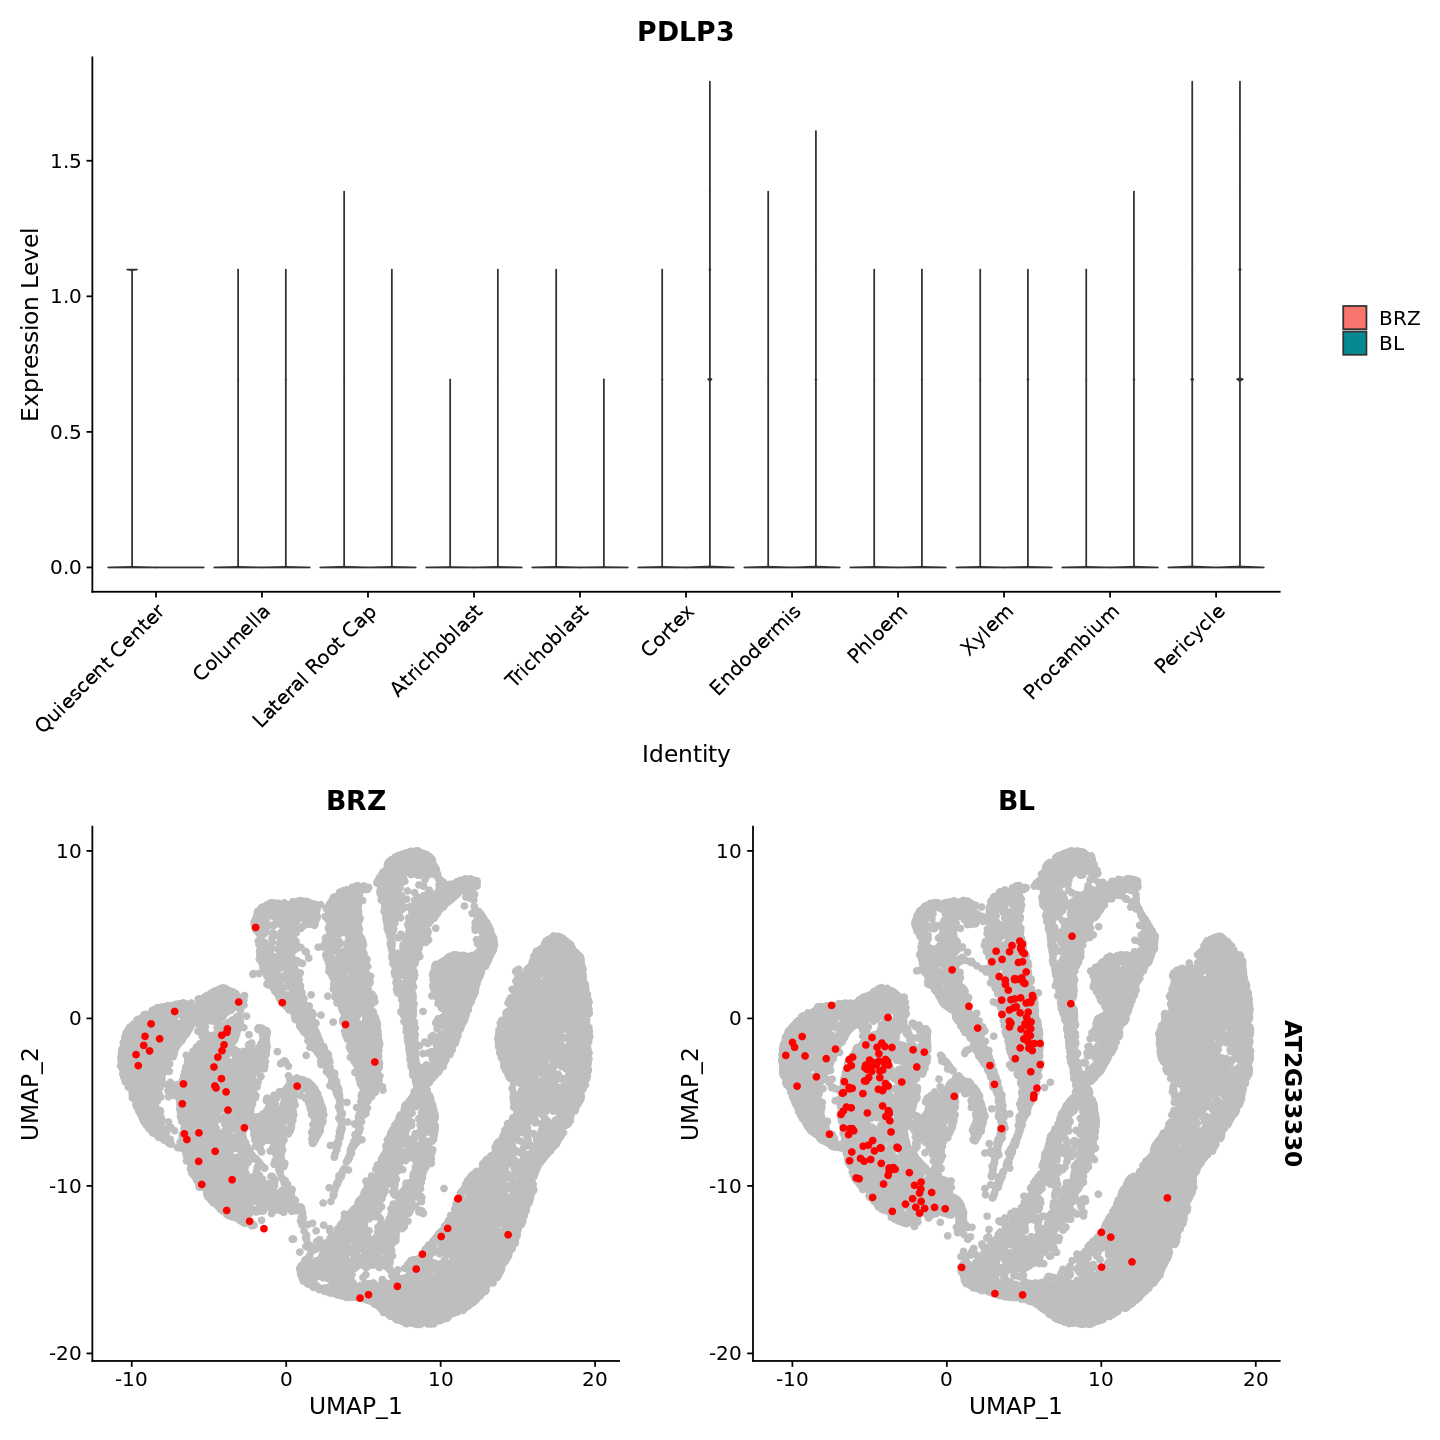

In [30]:
# PDLP3	AT2G33330	"callose deposition	"
options(repr.plot.width=12, repr.plot.height=12)
DefaultAssay(integrated.de) <- "SCT"
Idents(integrated.de) <- "cell_type"

vio_dot(gene_name = "PDLP3", gene_id = "AT2G33330")

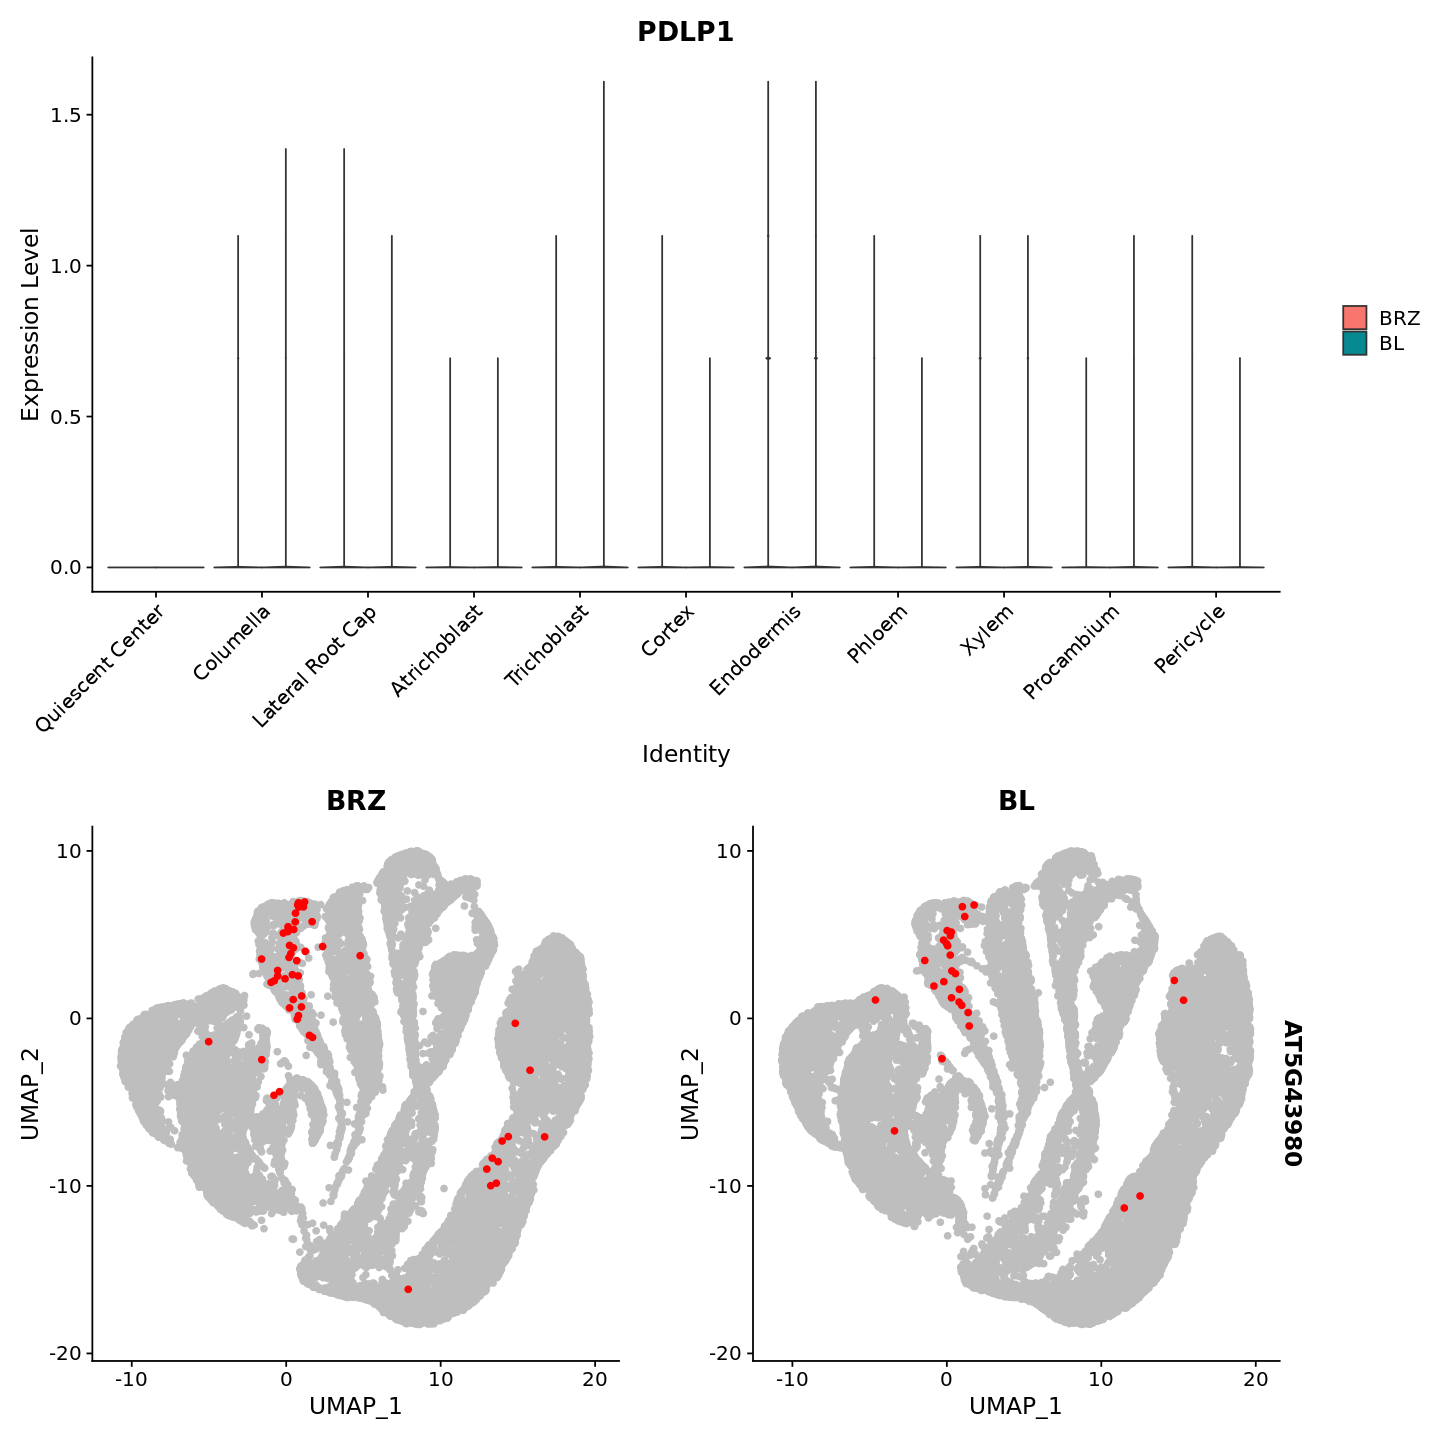

In [31]:
# AT5G43980	PDLP1	

options(repr.plot.width=12, repr.plot.height=12)


vio_dot(gene_name = "PDLP1", gene_id = "AT5G43980")

In [32]:
(to_plot <- filter(BL_pd) %>% ungroup() %>% select(gene_id=gene, gene_name=Name.x) %>% unique())

gene_id,gene_name
<chr>,<chr>
AT2G33330,CRRSP11
AT4G03550,CALS12
AT3G14570,CALS8
AT1G18650,PDCB3
AT1G05570,CALS1
AT5G43980,CRRSP56
AT1G66250,AT1G66250
AT3G59100,CALS6
AT1G70690,CRRSP2


In [33]:
BL_pd

X1,gene,cluster_id,sc_2.cpm,sc_43.cpm,sc_50.cpm,sc_5.cpm,sc_46.cpm,sc_49.cpm,sc_2.frq,⋯,p_adj.loc,p_adj.glb,contrast,Name.x,TF_Name,Description,up_dn_label,clust_up_dn,Name.y,type
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
671,AT2G33330,Elongation_Cortex,1.950,2.49,0.82,20.20,31.40,38.20,0.0337,⋯,1.00e-21,1.18e-18,BL-BRZ,CRRSP11,NA,NA,Up,Elongation_Cortex_Up,PDLP3,callose deposition
1150,AT2G33330,Transition Domain_Cortex,2.650,6.77,1.17,18.00,30.90,29.30,0.0493,⋯,6.41e-17,2.23e-13,BL-BRZ,CRRSP11,NA,NA,Up,Transition Domain_Cortex_Up,PDLP3,callose deposition
1962,AT4G03550,Elongation_Atrichoblast,36.500,19.20,22.10,119.00,71.90,58.10,0.2420,⋯,1.14e-12,1.08e-08,BL-BRZ,CALS12,NA,NA,Up,Elongation_Atrichoblast_Up,CalS12/GSL5,callose deposition
4028,AT4G03550,Transition Domain_Atrichoblast,62.500,47.70,29.70,138.00,69.10,79.40,0.5520,⋯,2.09e-08,4.47e-04,BL-BRZ,CALS12,NA,NA,Up,Transition Domain_Atrichoblast_Up,CalS12/GSL5,callose deposition
4407,AT3G14570,Transition Domain_Pericycle,6.540,0.00,0.00,39.10,87.70,46.30,0.0909,⋯,5.59e-08,8.56e-05,BL-BRZ,CALS8,NA,NA,Up,Transition Domain_Pericycle_Up,CalS8/GSL4,callose deposition
5622,AT1G18650,Transition Domain_Cortex,6.840,7.57,6.41,17.20,28.50,17.90,0.1080,⋯,7.68e-07,1.13e-02,BL-BRZ,PDCB3,NA,NA,Up,Transition Domain_Cortex_Up,PDCB3,callose binding
6187,AT1G05570,Proliferation Domain_Atrichoblast,0.802,3.78,2.53,5.32,12.50,8.18,0.0303,⋯,1.98e-06,2.37e-02,BL-BRZ,CALS1,NA,NA,Up,Proliferation Domain_Atrichoblast_Up,CalS1/GSL6,callose deposition
6272,AT1G18650,Proliferation Domain_Atrichoblast,2.140,5.87,4.48,7.22,15.40,13.00,0.0707,⋯,2.22e-06,2.68e-02,BL-BRZ,PDCB3,NA,NA,Up,Proliferation Domain_Atrichoblast_Up,PDCB3,callose binding
8773,AT5G43980,Elongation_Endodermis,17.600,17.40,26.80,8.28,8.86,13.90,0.2640,⋯,4.07e-05,8.67e-01,BL-BRZ,CRRSP56,NA,NA,Down,Elongation_Endodermis_Down,PDLP1,callose deposition


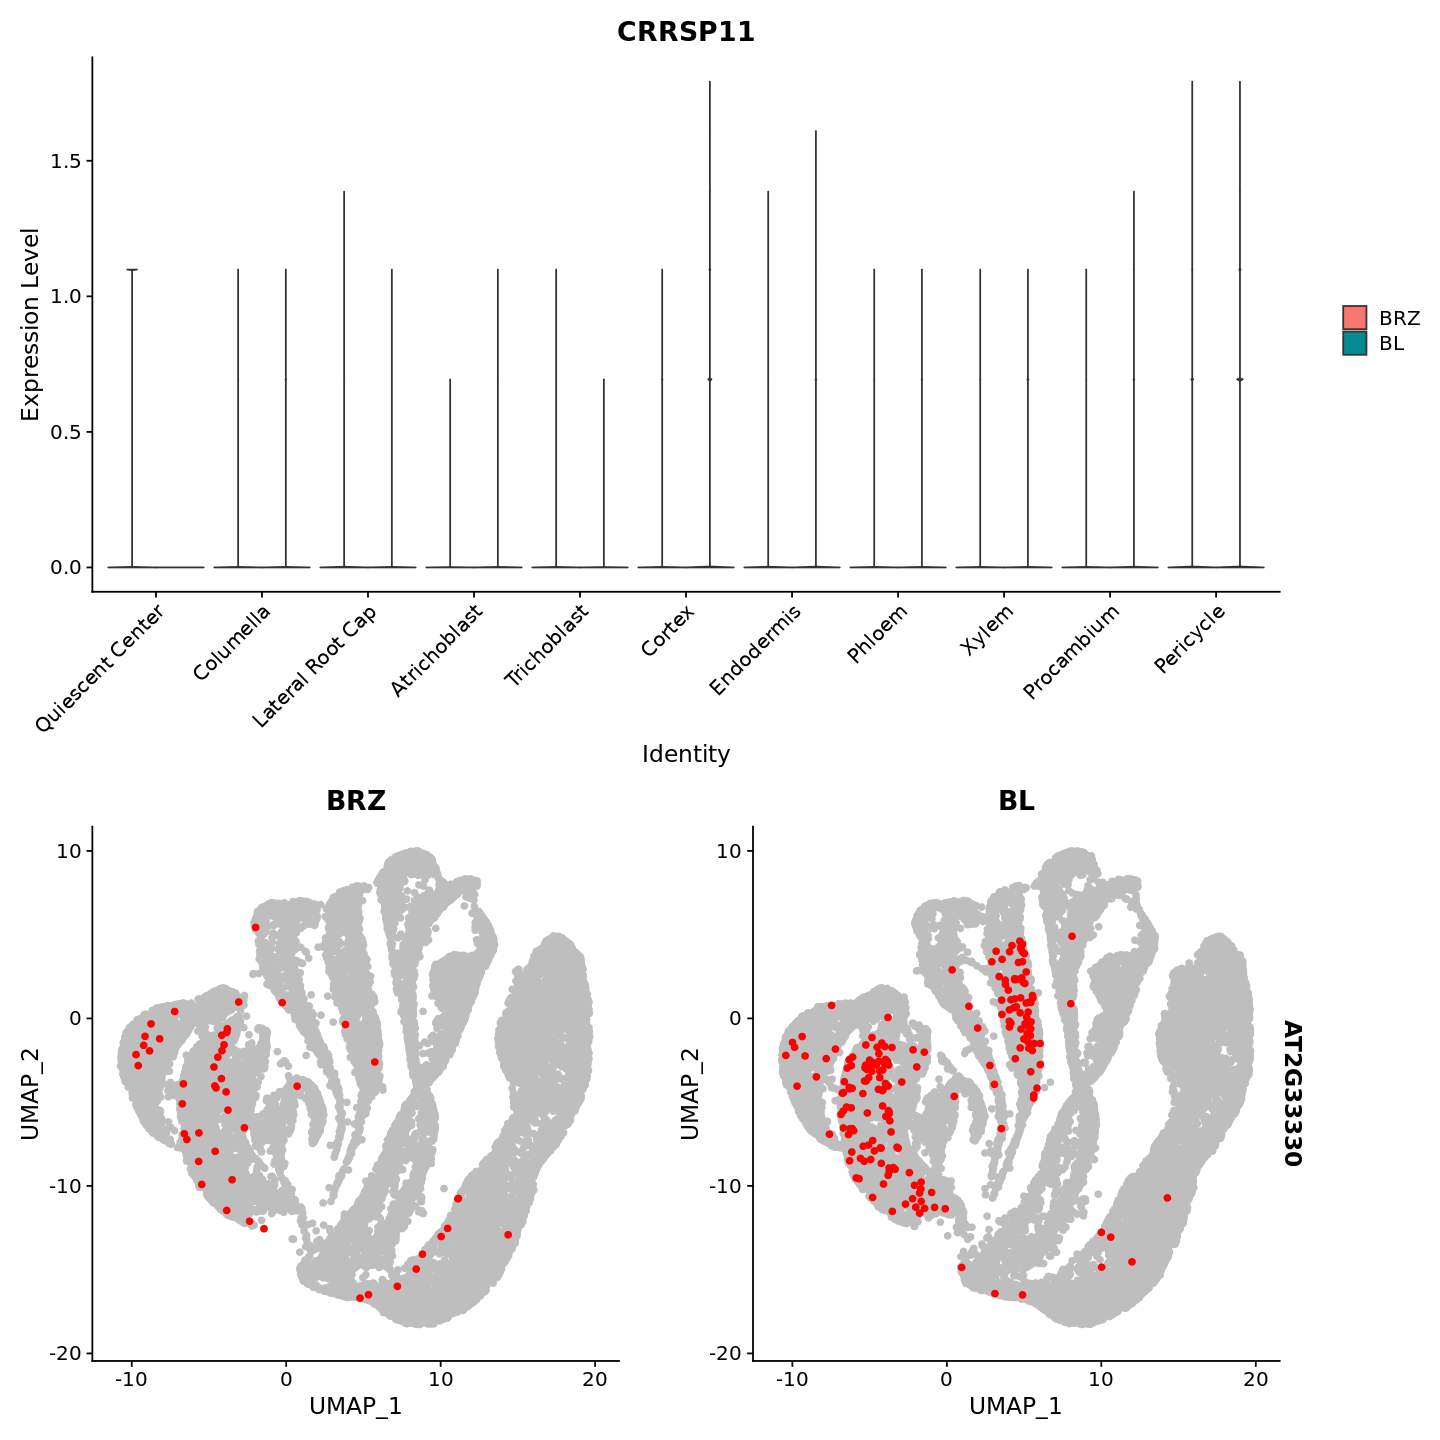

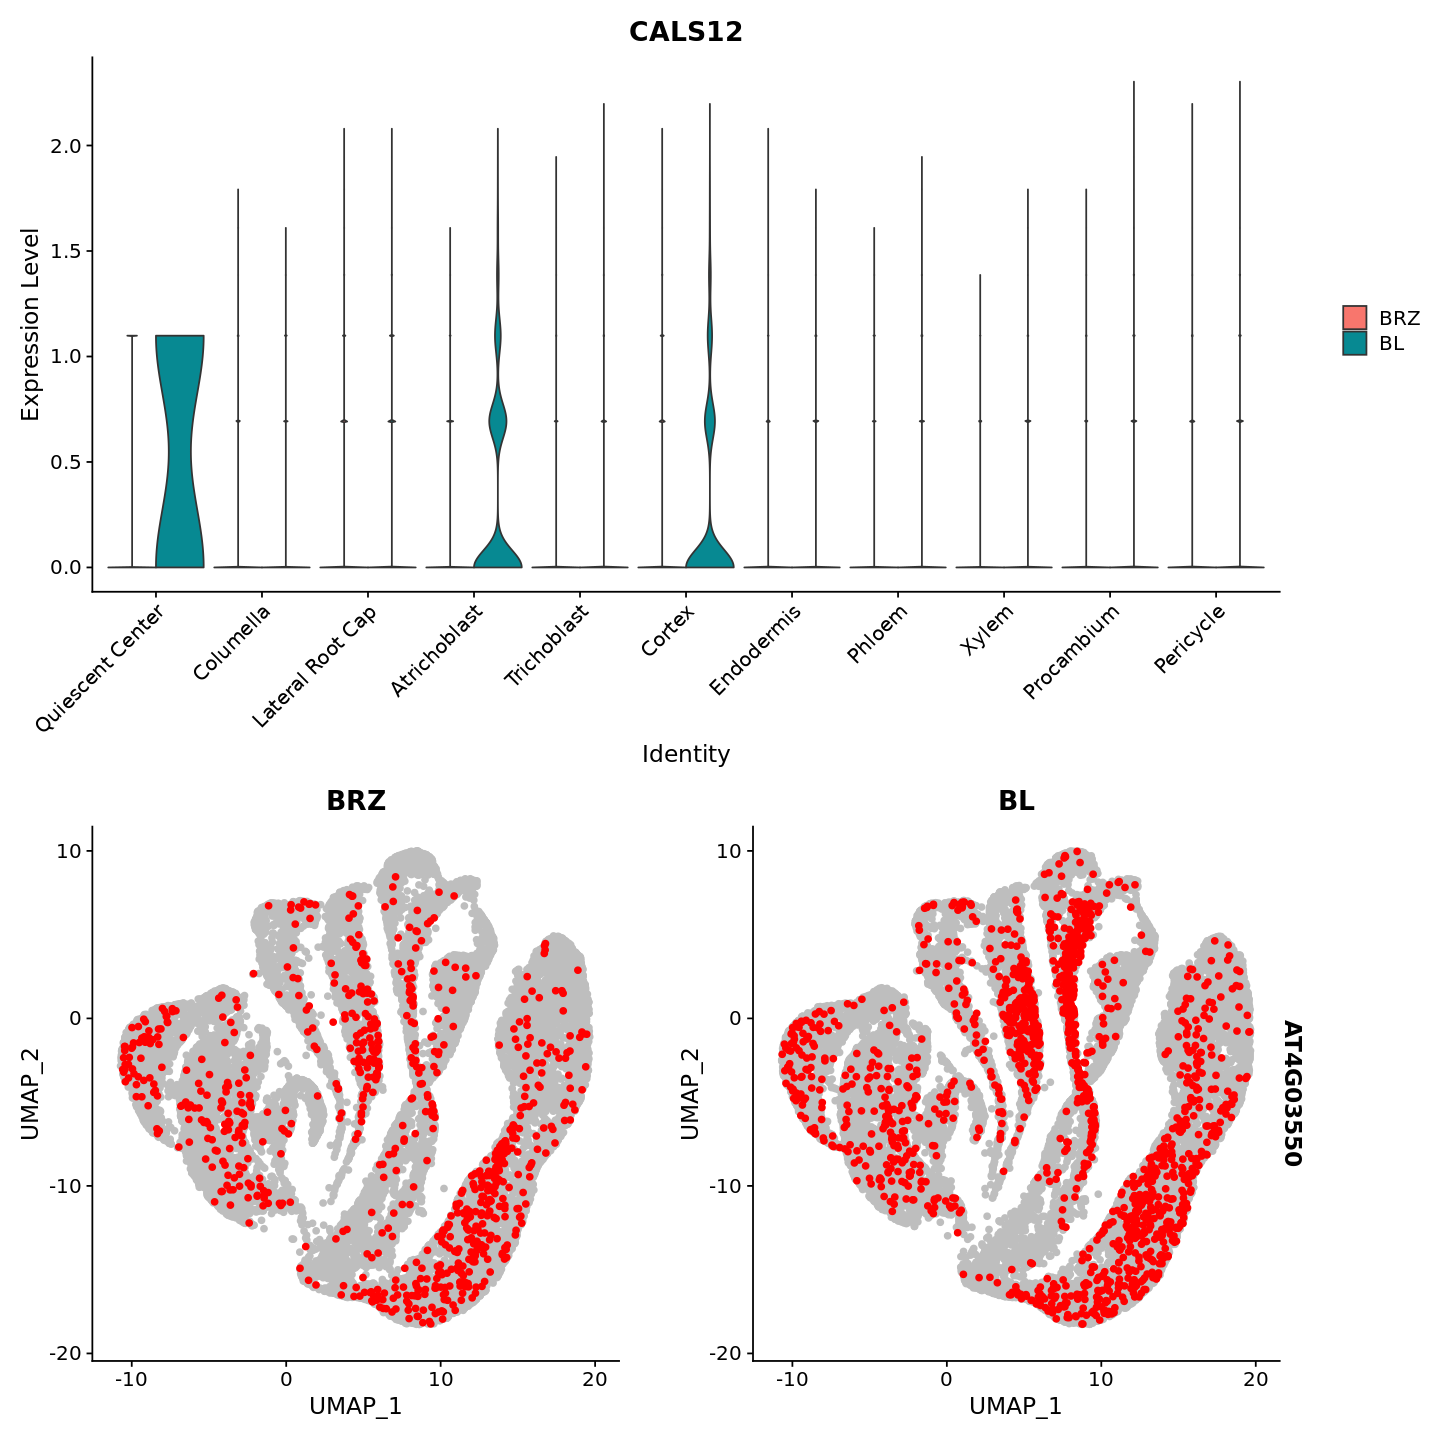

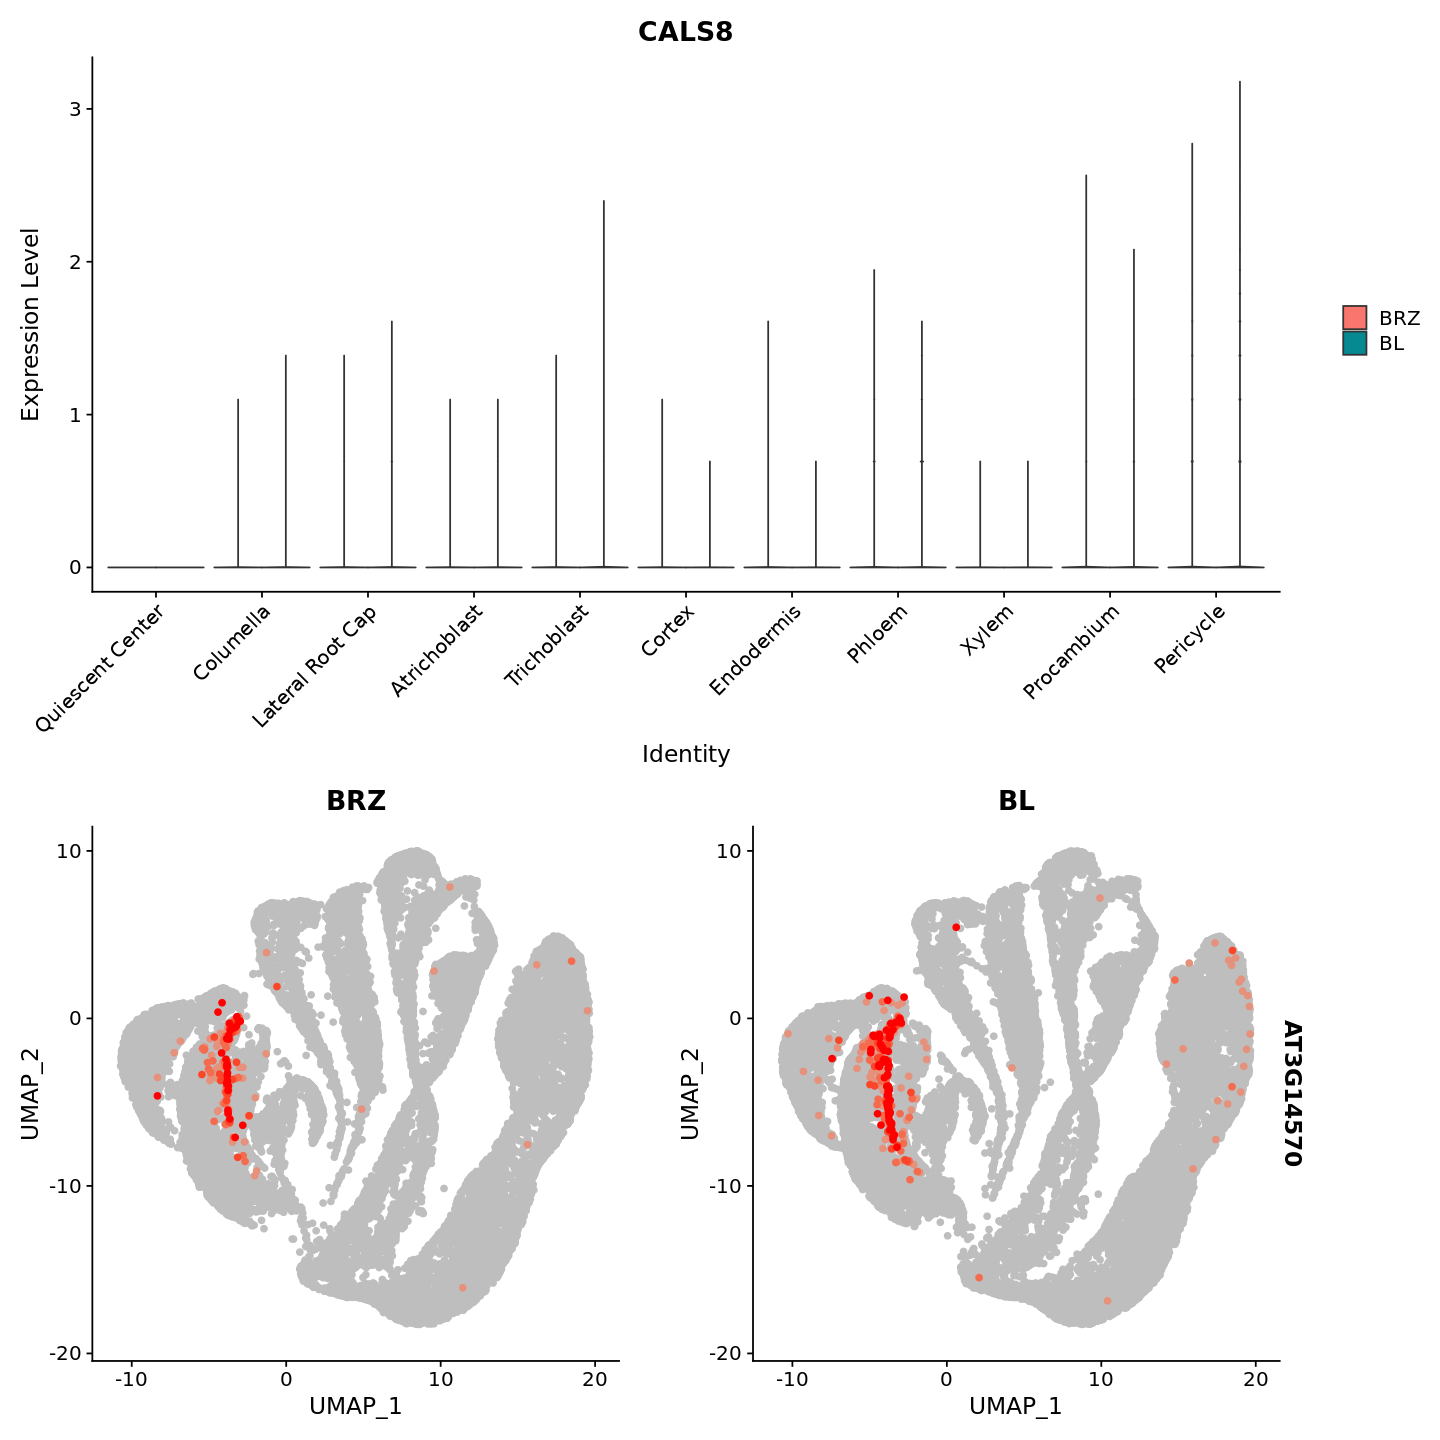

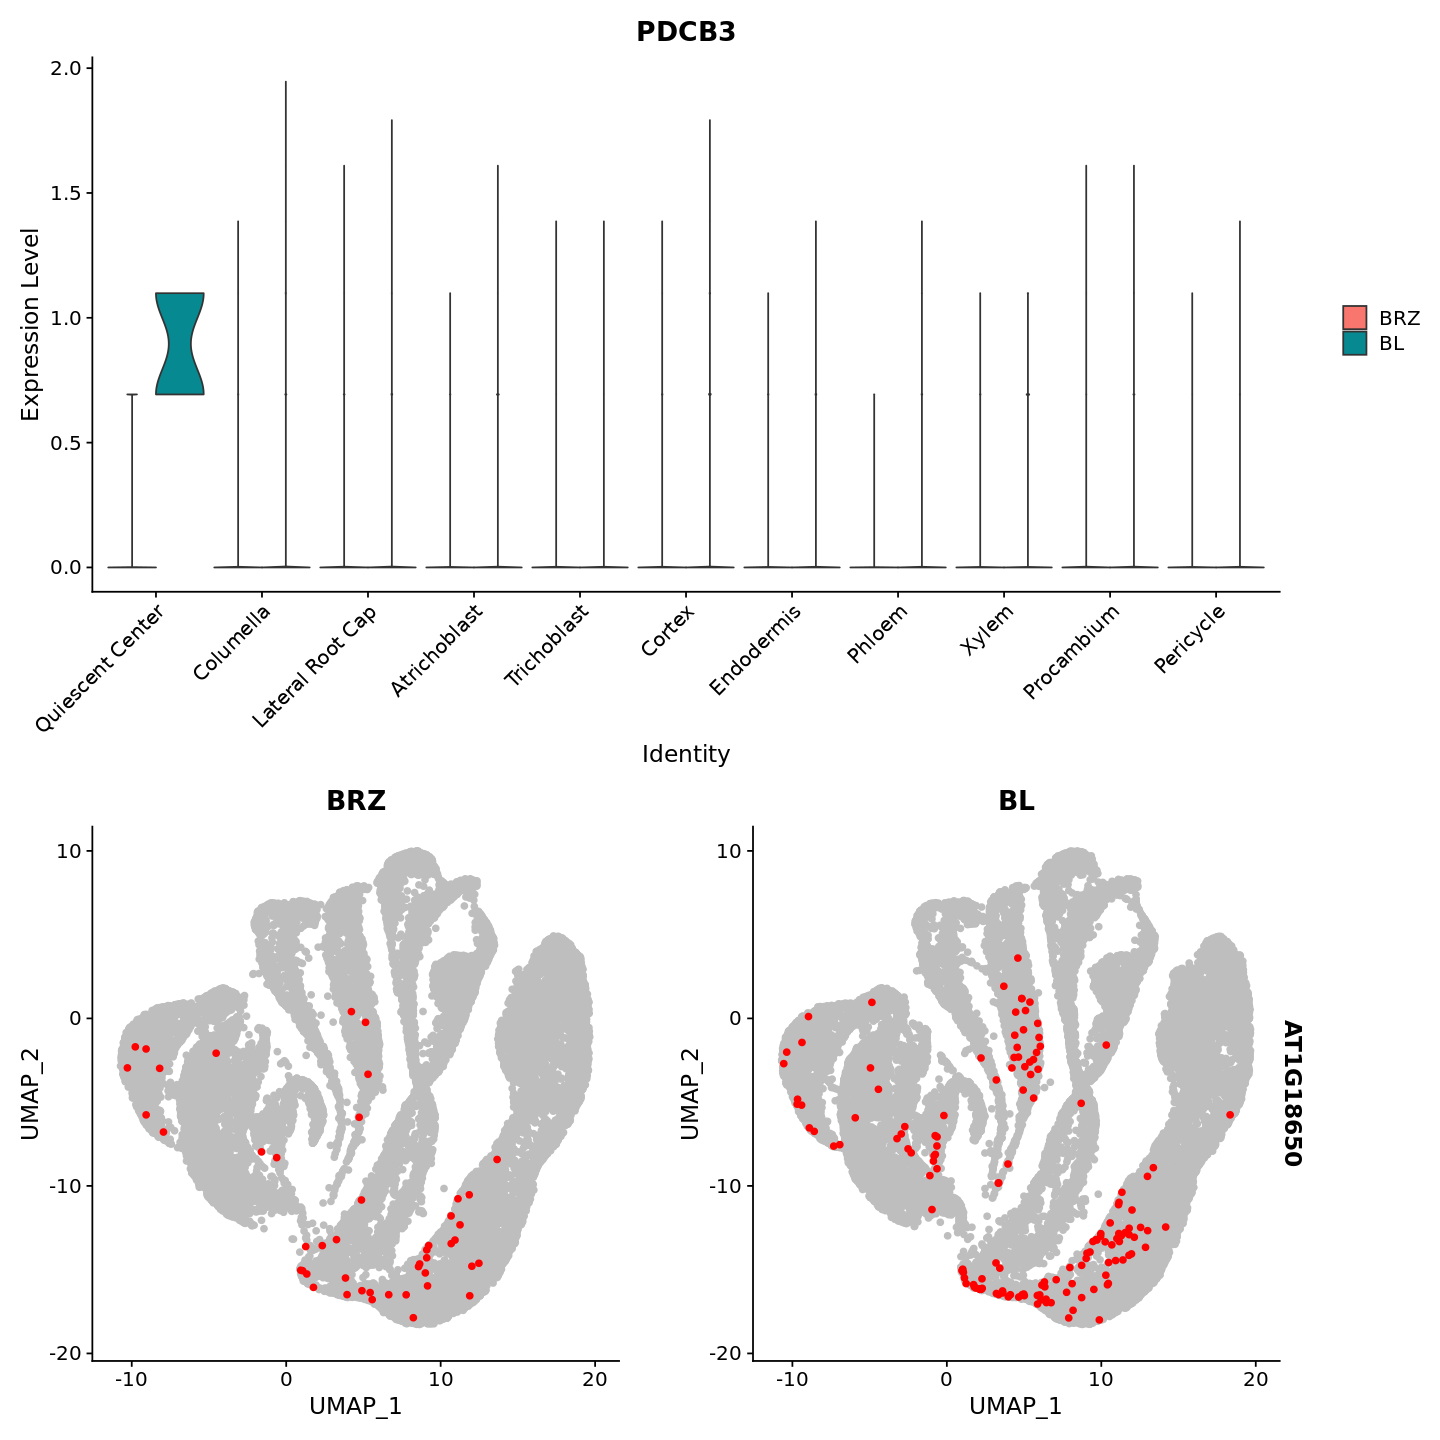

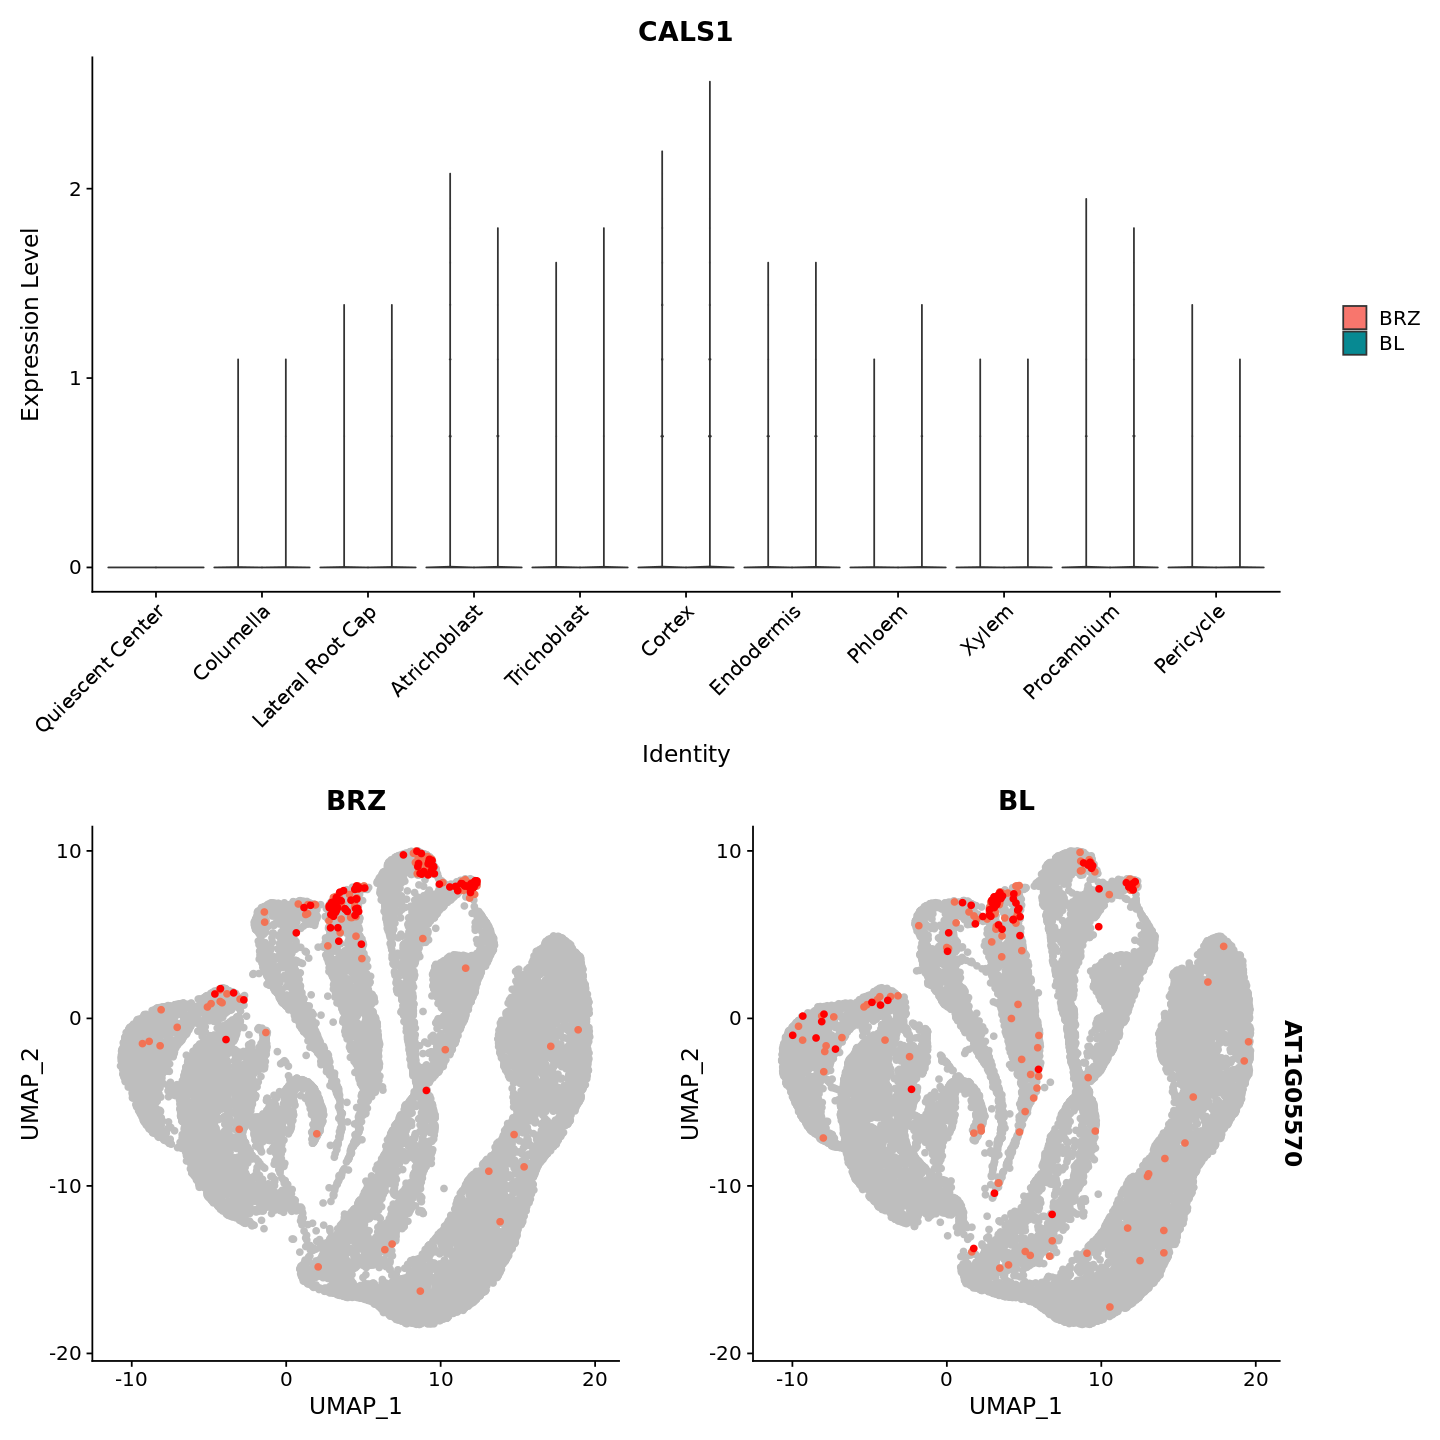

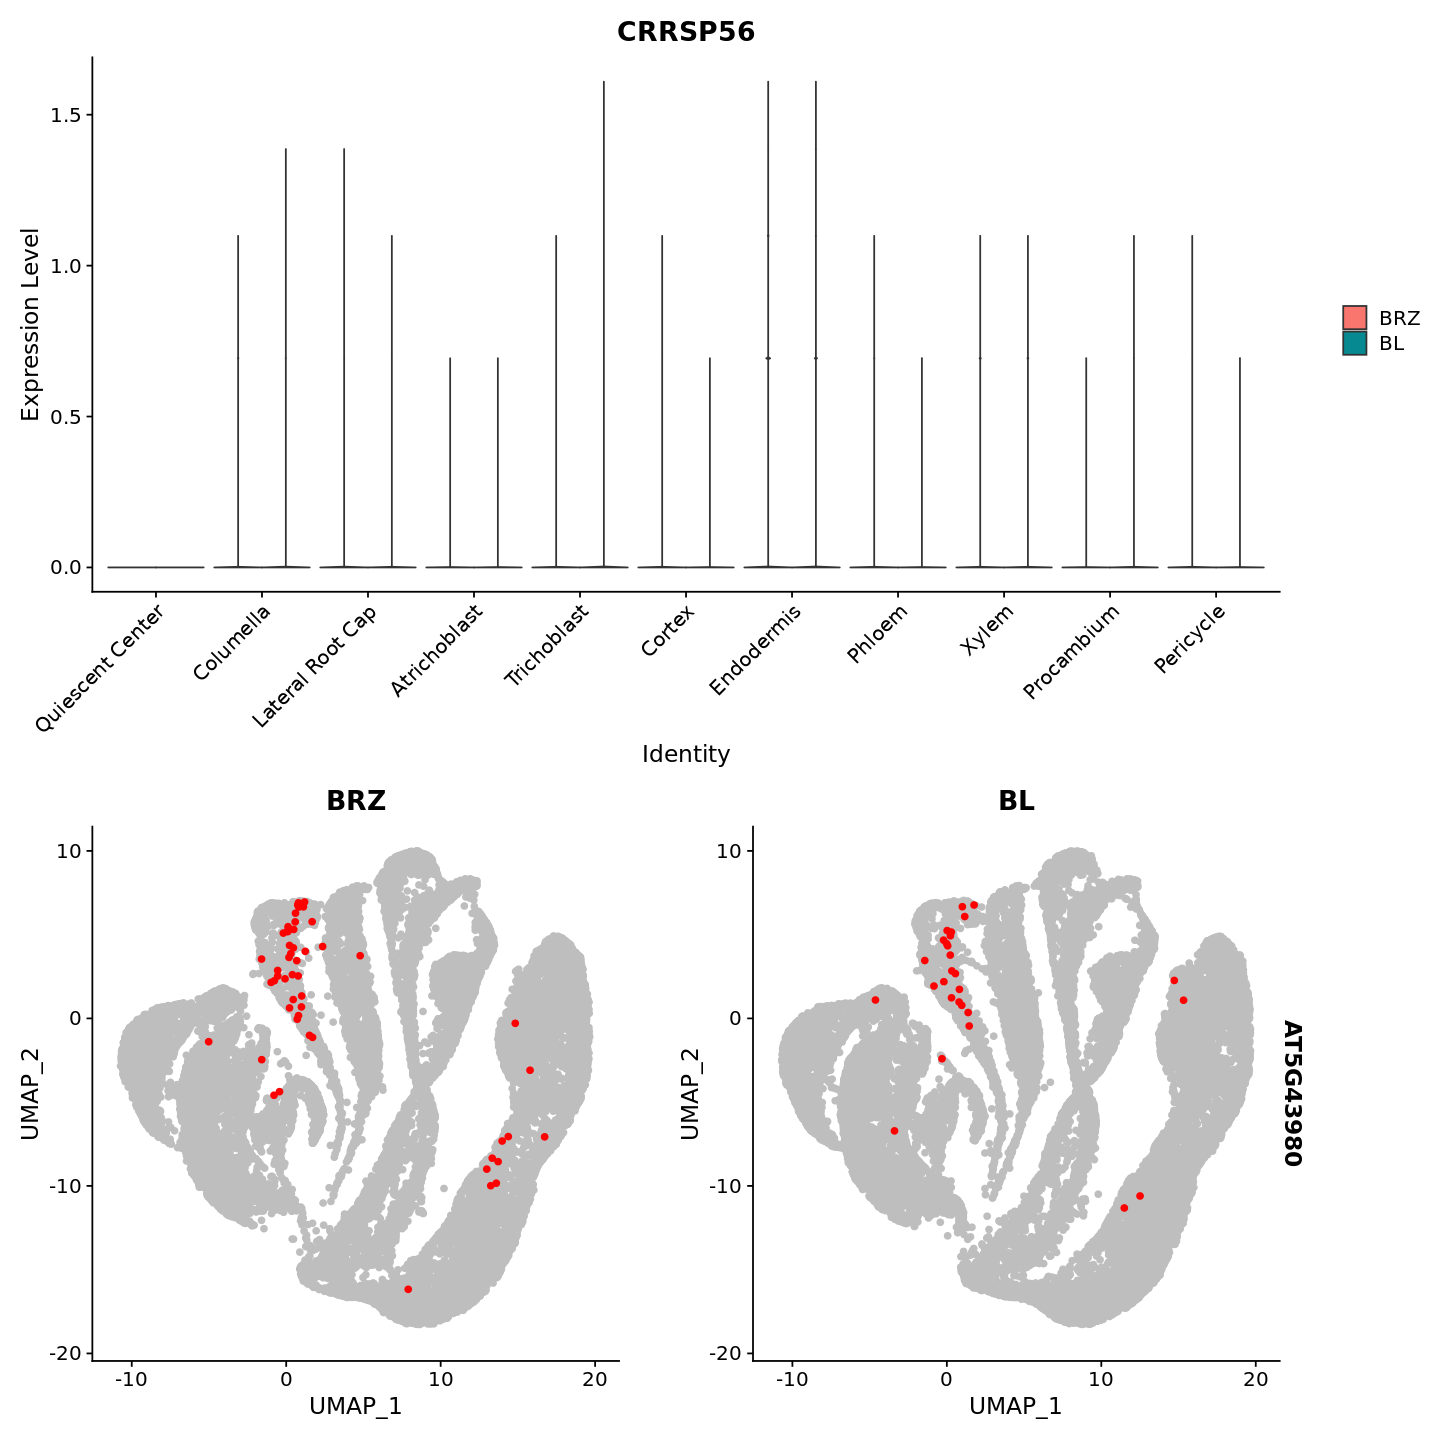

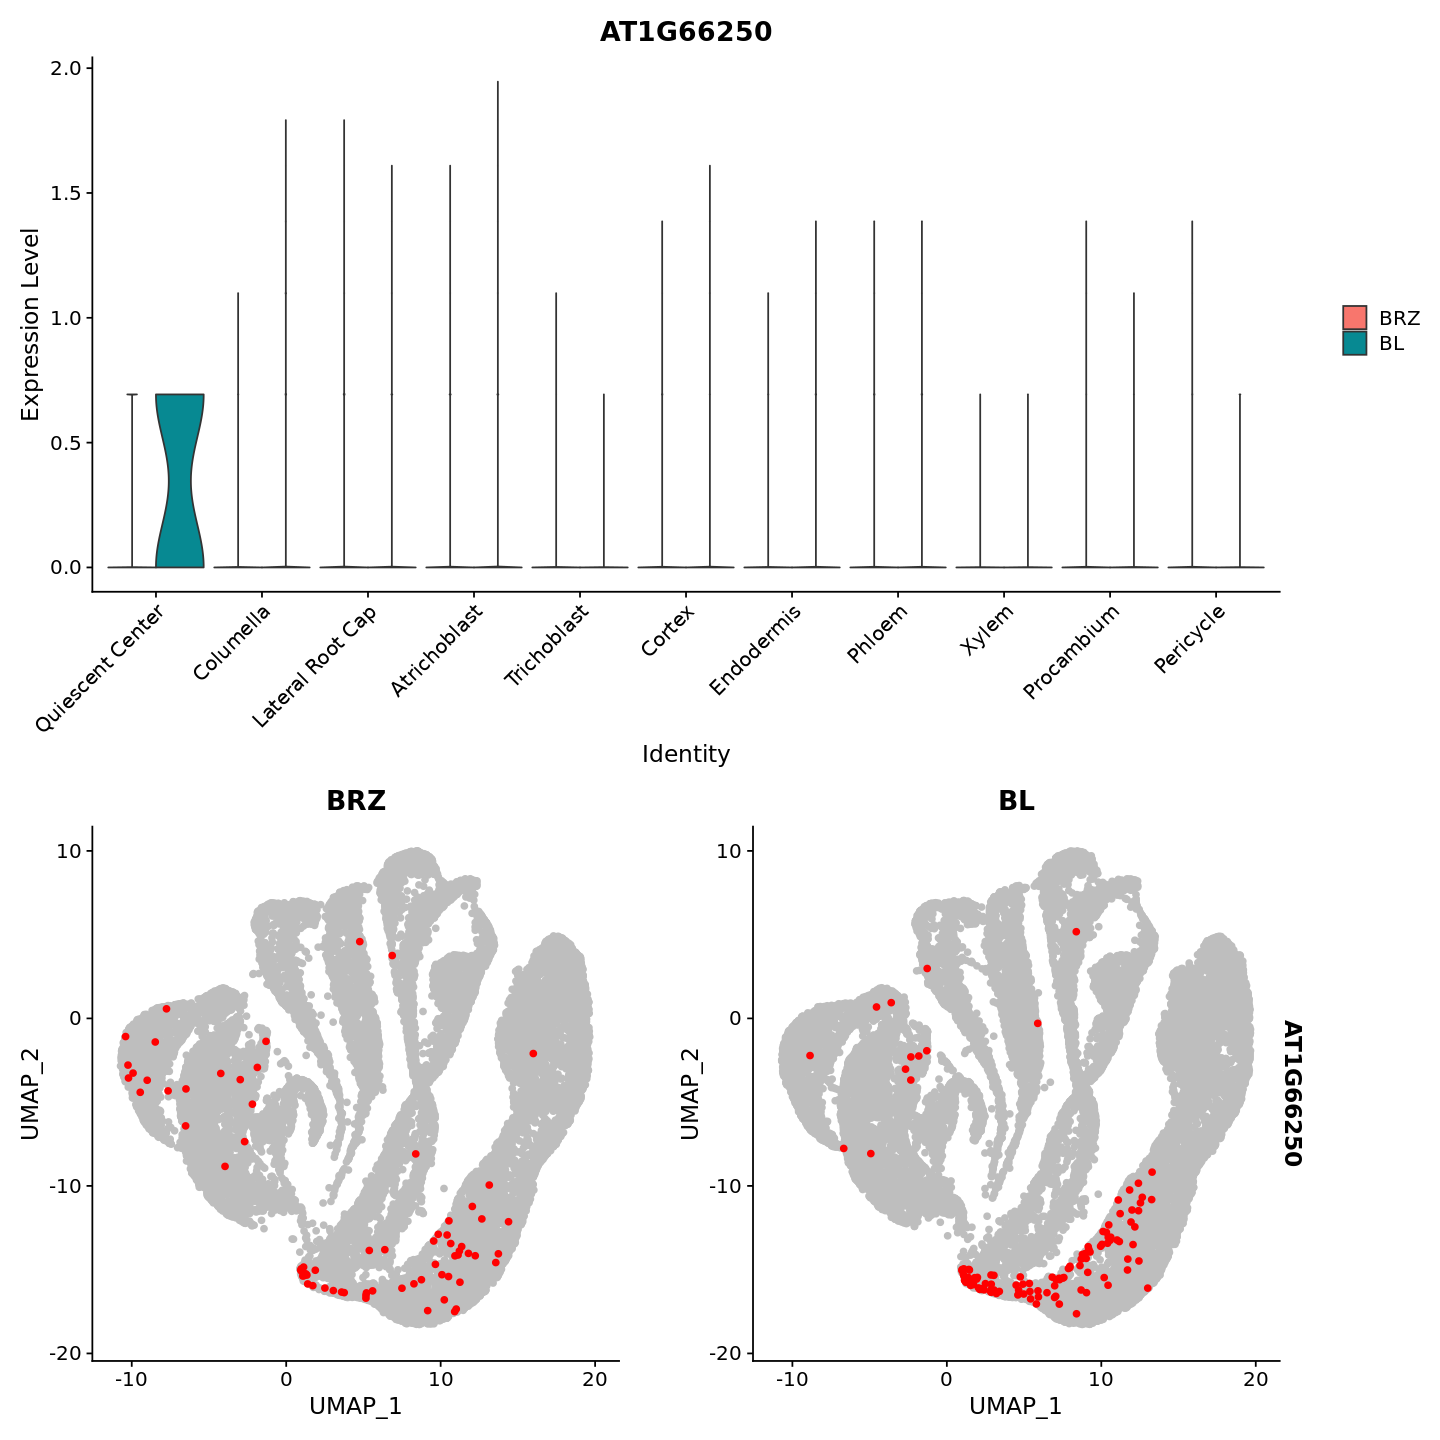

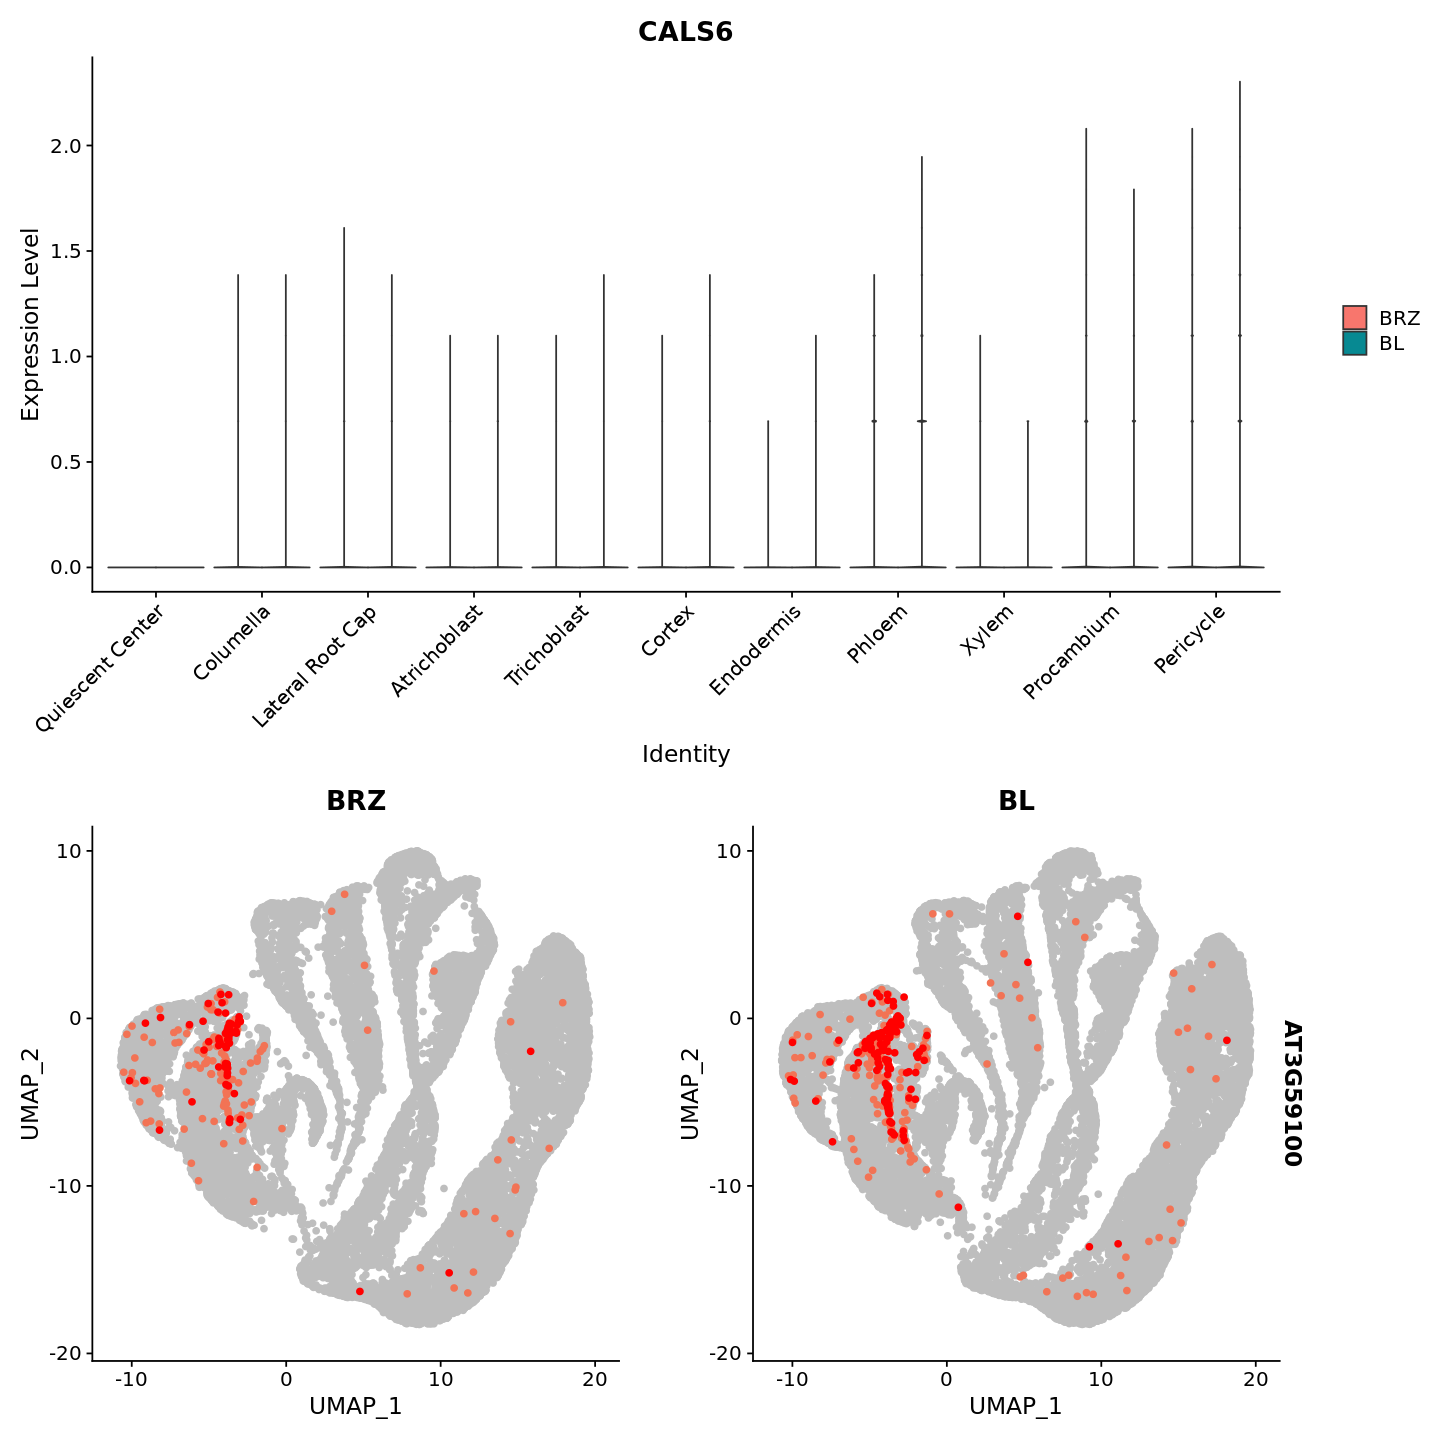

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


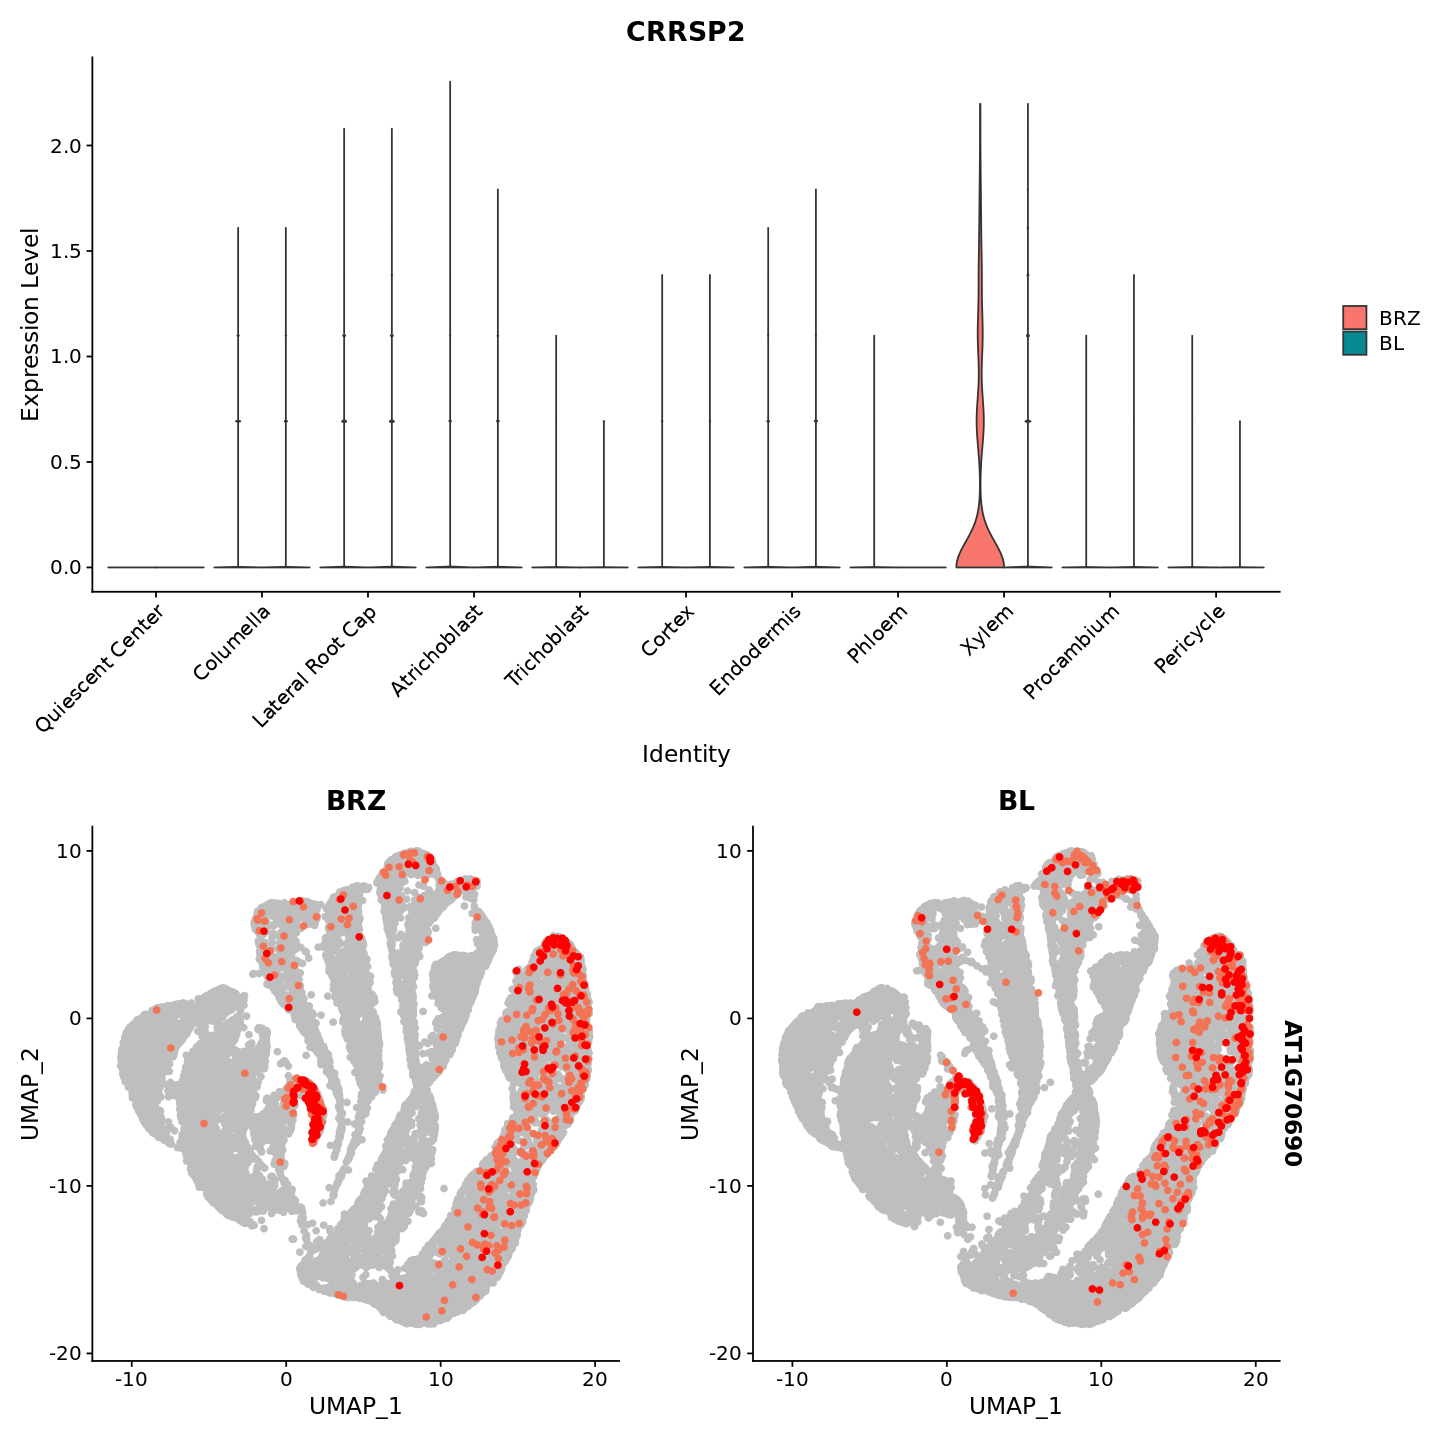

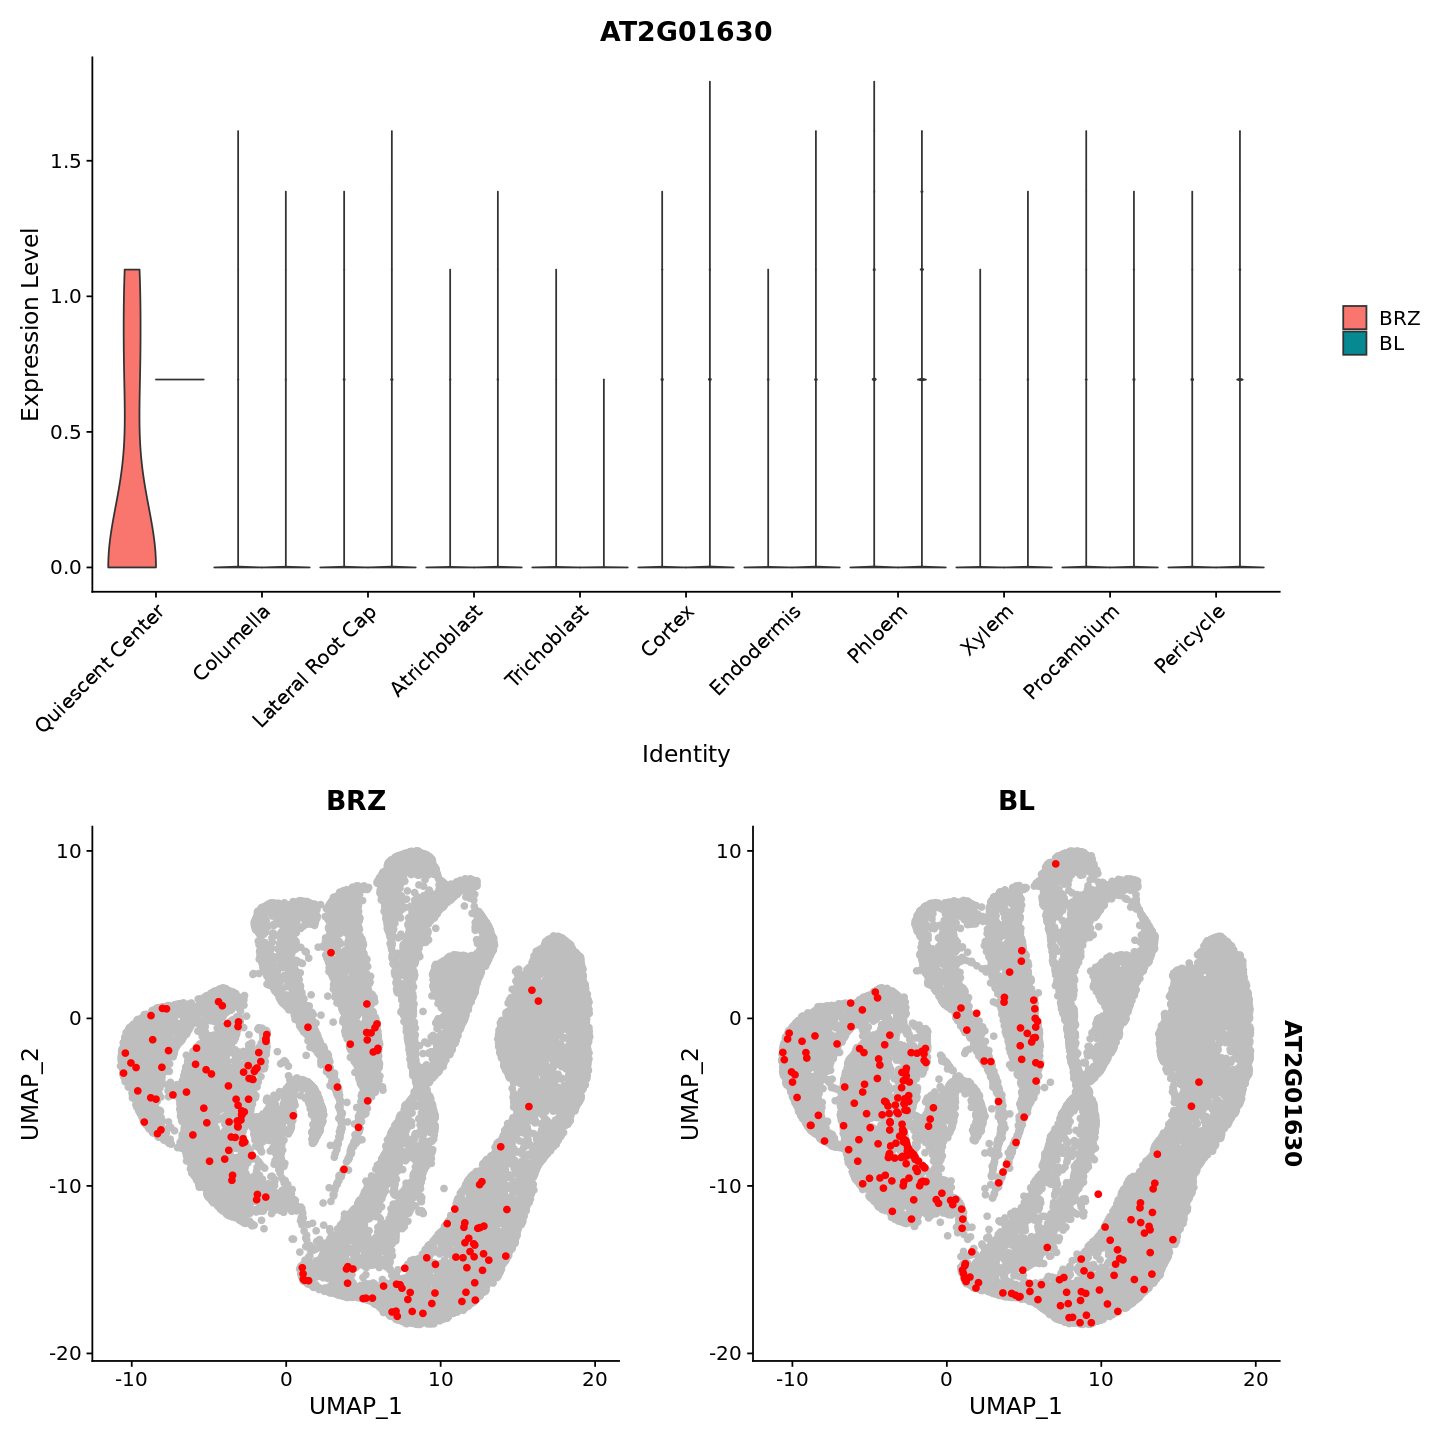

In [34]:
pmap(to_plot, vio_dot)